In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import numpy as np
import math
%matplotlib inline

sys.path.append('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/results/paper')

## Virus Abundance Plot

In [2]:
df = pd.read_csv('virus_abundance_data.csv', index_col=0)
df.head()

,batch,Human herpesvirus 6B,Enterobacteria phage phiX174,Human parvovirus B19,Human herpesvirus 7,"Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102",Human herpesvirus 6A,Squirrel monkey retrovirus - HLB,Enterobacteria phage lambda,Moloney murine leukemia virus,...,"Torque teno mini virus 10 isolate LIL-y1 ORF2, ORF1, ORF3, and ORF4 genes, complete cds","Torque teno midi virus 8 DNA, isolate: MDJN1",Hepatitis C virus genotype 1,Lactobacillus phage Lv-1,Woodchuck hepatitis virus,Pseudomonas phage EL,Enterobacteria phage RB32,Bordetella phage BIP-1,Staphylococcus phage SAP-26,Enterococcus phage phiFL4A
03C23190 - LCL - AU1157,batch_01009,0.0,1085585.0,NaN,0.0,NaN,0.0,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23194 - WB - AU1157,batch_01009,0.0,1064727.0,NaN,0.0,NaN,0.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23208 - WB - AU1157,batch_01009,0.0,1090048.0,NaN,0.0,NaN,0.0,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23209 - WB - AU1157,batch_01009,0.0,1057893.0,NaN,1.0,NaN,0.0,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23211 - WB - AU1157,batch_01009,0.0,1231973.0,NaN,1.0,NaN,0.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(4568, 249)

In [8]:
column_labels = {x: x.split(', ')[0] for x in df.columns}
df.rename(columns=column_labels, inplace=True)

type_col = [x.split(' - ')[1] for x in list(df.index)]
df['type'] = type_col
df.head()

,batch,Human herpesvirus 6B,Enterobacteria phage phiX174,Human parvovirus B19,Human herpesvirus 7,Human betaherpesvirus 6A,Human herpesvirus 6A,Squirrel monkey retrovirus - HLB,Enterobacteria phage lambda,Moloney murine leukemia virus,...,Torque teno midi virus 8 DNA,Hepatitis C virus genotype 1,Lactobacillus phage Lv-1,Woodchuck hepatitis virus,Pseudomonas phage EL,Enterobacteria phage RB32,Bordetella phage BIP-1,Staphylococcus phage SAP-26,Enterococcus phage phiFL4A,type
03C23190 - LCL - AU1157,batch_01009,0.0,1085585.0,NaN,0.0,NaN,0.0,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCL
03C23194 - WB - AU1157,batch_01009,0.0,1064727.0,NaN,0.0,NaN,0.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB
03C23208 - WB - AU1157,batch_01009,0.0,1090048.0,NaN,0.0,NaN,0.0,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB
03C23209 - WB - AU1157,batch_01009,0.0,1057893.0,NaN,1.0,NaN,0.0,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB
03C23211 - WB - AU1157,batch_01009,0.0,1231973.0,NaN,1.0,NaN,0.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB


In [9]:
columns = list(df.columns[:52])
columns.append('type')

# take top 50
df_melt = pd.melt(df.loc[:, columns].reset_index(), id_vars=['index', 'batch', 'type'])
df_melt.rename(columns={'variable': 'virus', 'value': 'read counts'}, inplace=True)

In [10]:
df_melt.head()

,index,batch,type,virus,read counts
0,03C23190 - LCL - AU1157,batch_01009,LCL,Human herpesvirus 6B,0.0
1,03C23194 - WB - AU1157,batch_01009,WB,Human herpesvirus 6B,0.0
2,03C23208 - WB - AU1157,batch_01009,WB,Human herpesvirus 6B,0.0
3,03C23209 - WB - AU1157,batch_01009,WB,Human herpesvirus 6B,0.0
4,03C23211 - WB - AU1157,batch_01009,WB,Human herpesvirus 6B,0.0


In [7]:
print(df['batch'].nunique())

54


help: https://stackoverflow.com/questions/38650895/how-do-i-add-multiple-markers-to-a-stripplot-in-seaborn

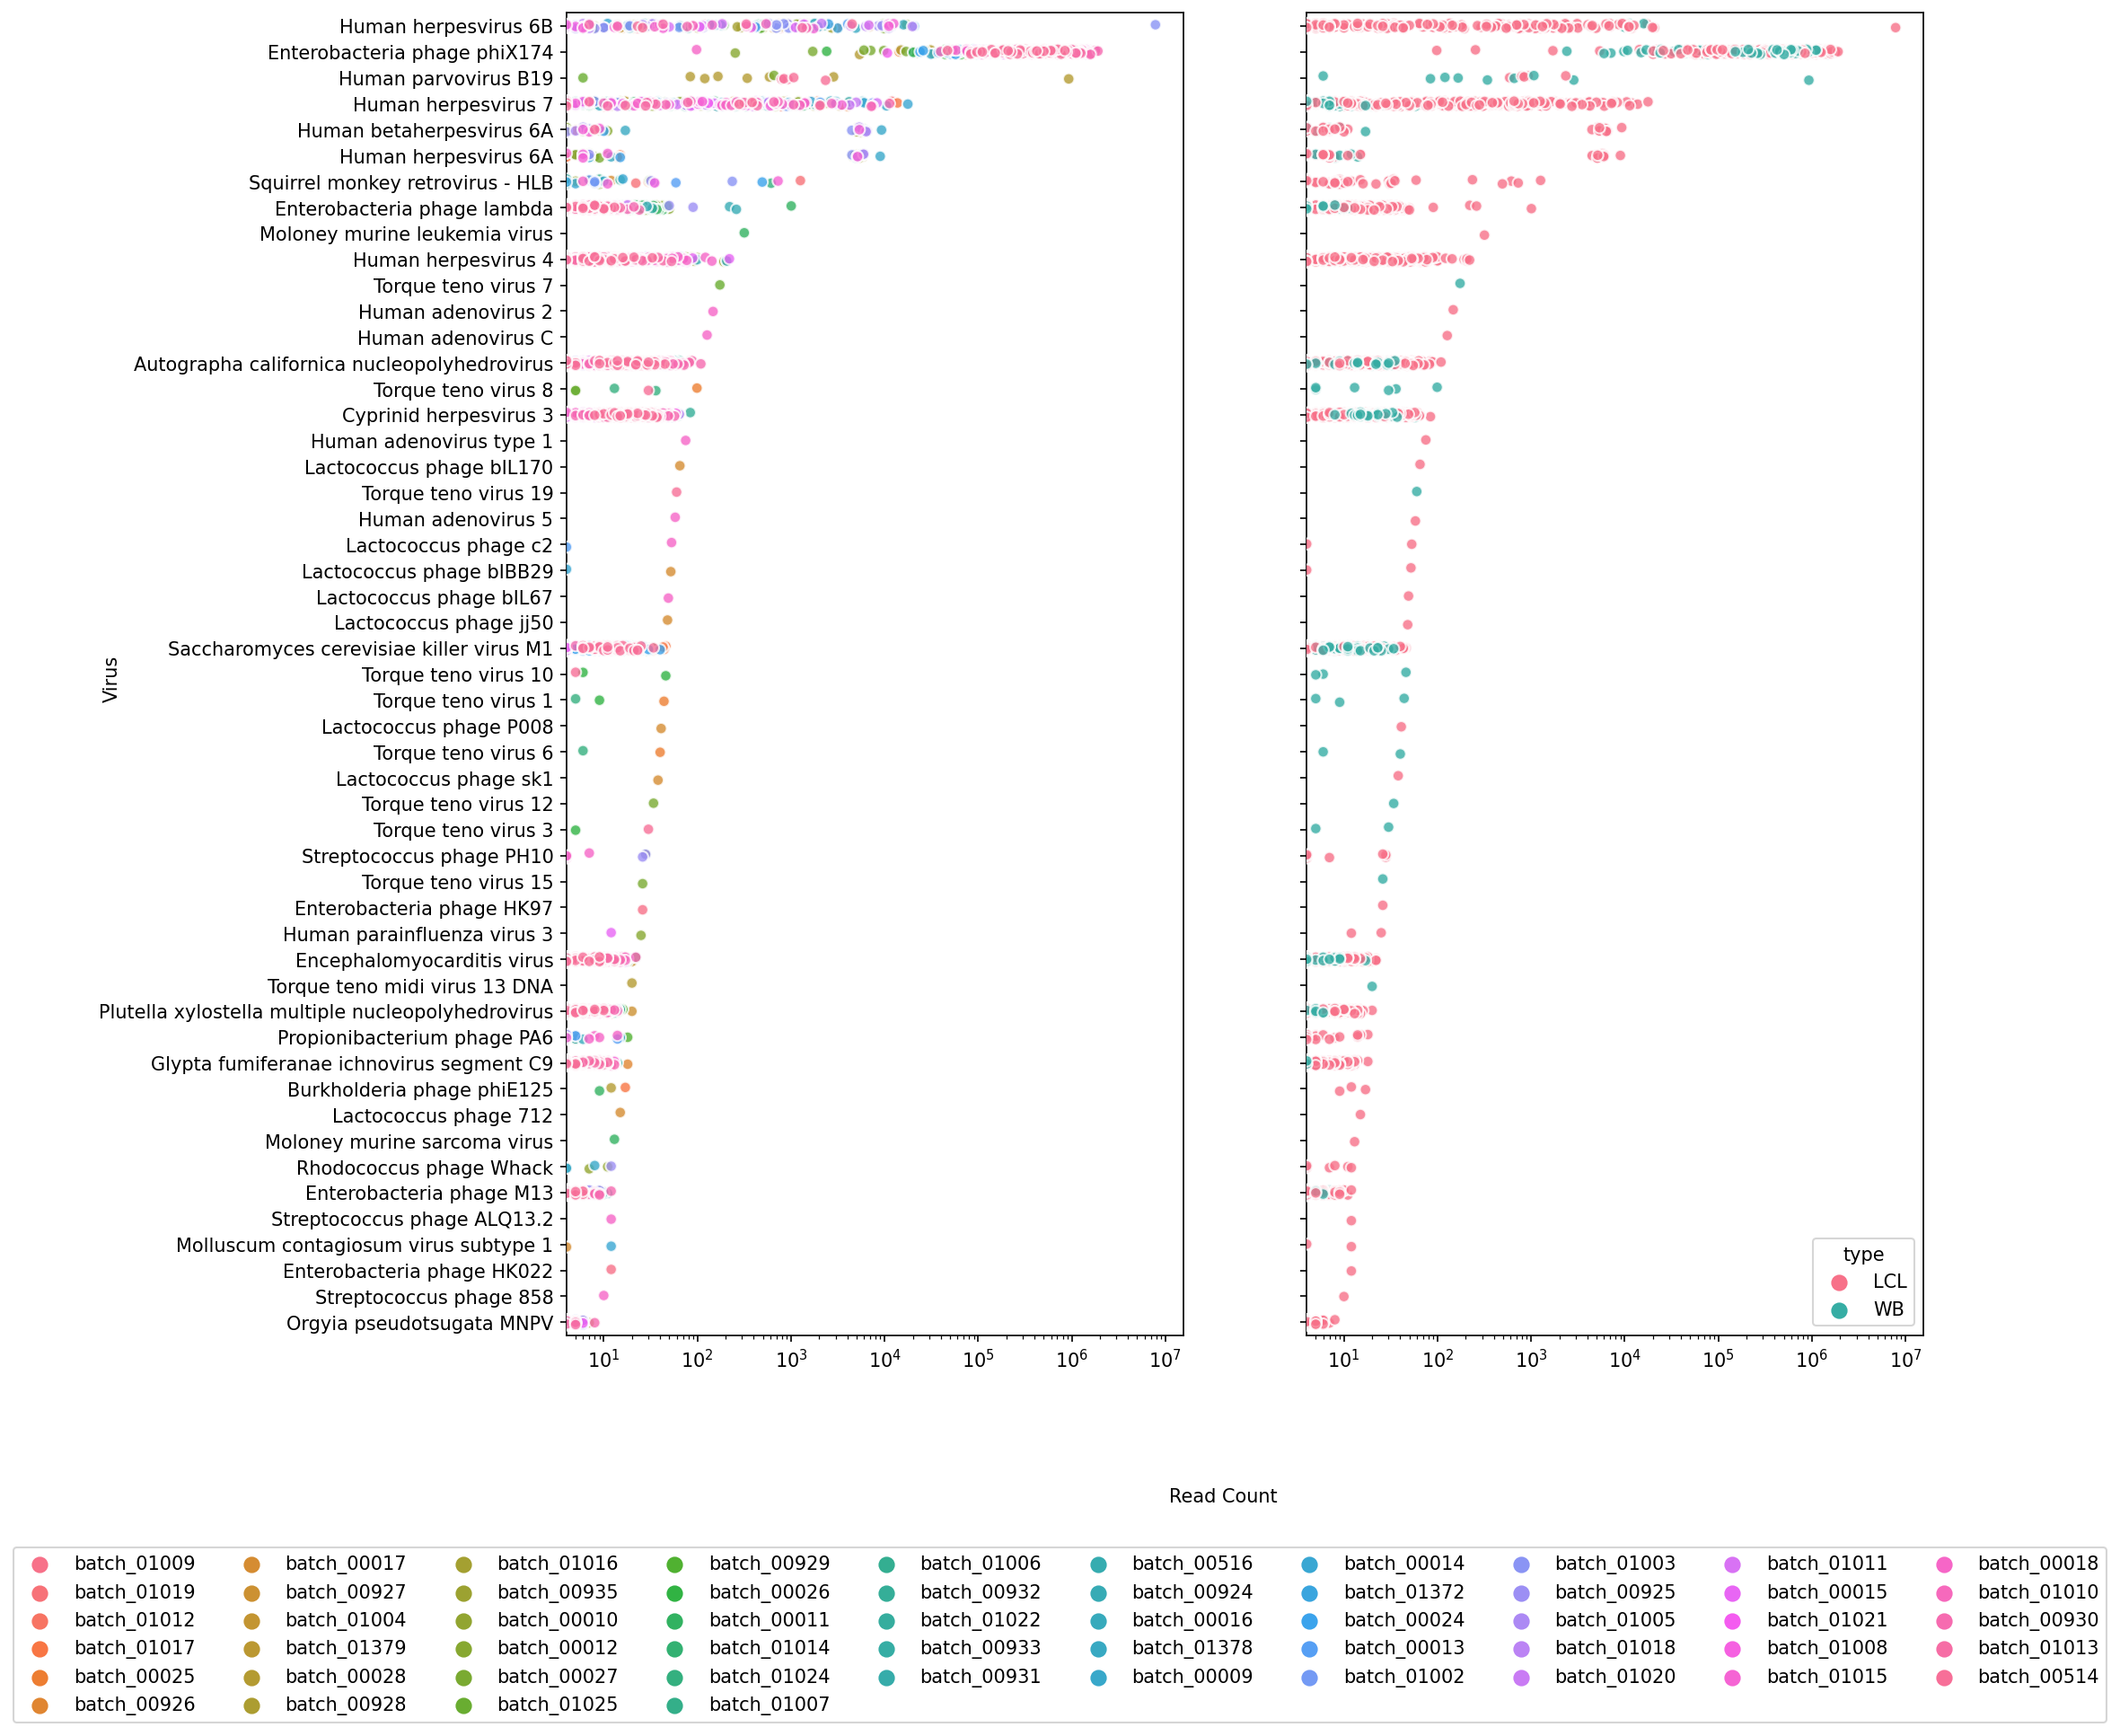

In [20]:
fig, axes = plt.subplots(figsize=(13,13), dpi=150, sharex=True, sharey=True)
ax1 = plt.subplot(121)
ax1.set(xscale="log")
sns.stripplot(data=df_melt, x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
plt.legend(loc="lower center", bbox_to_anchor=(0.8, -0.3), ncol=10)
ax1.set_ylabel('')    
ax1.set_xlabel('')

ax2 = plt.subplot(122)
ax2.set(xscale="log")
sns.stripplot(data=df_melt, x='read counts', y='virus', hue='type', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
ax2.set_ylabel('')    
ax2.set_xlabel('')
plt.setp(ax2.get_yticklabels(), visible=False)

fig.text(0.5, 0.03, 'Read Count', ha='center')
fig.text(-0.14, 0.5, 'Virus', va='center', rotation='vertical')
plt.show()

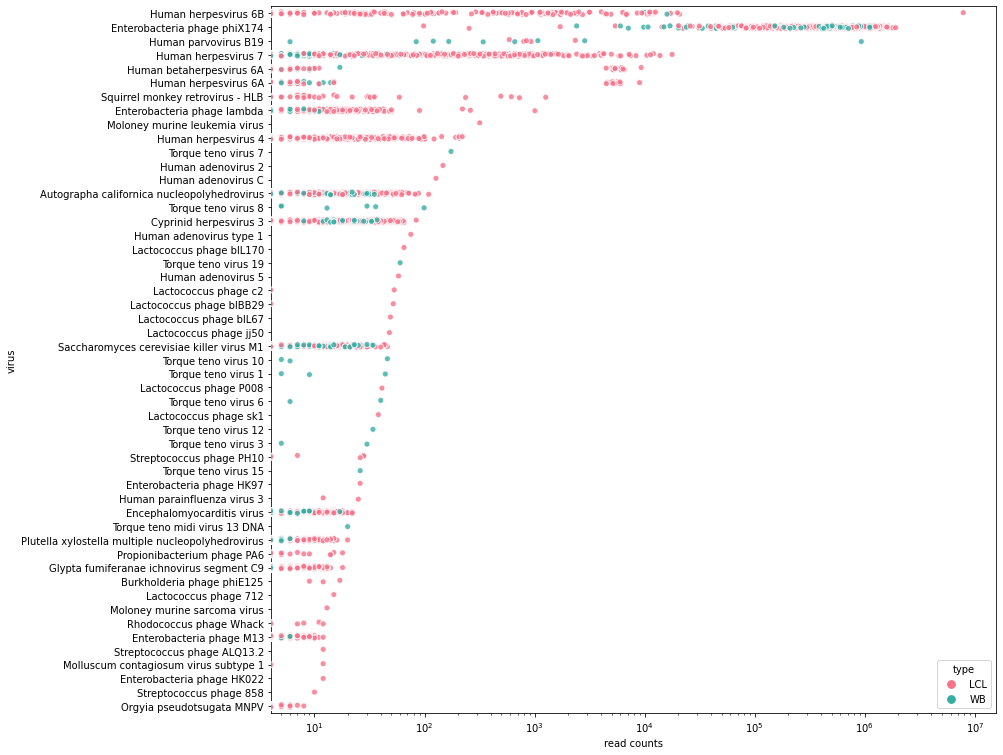

In [14]:
# fig, ax = plt.subplots(figsize=(13,13))
# ax.set(xscale="log")
# chart = sns.stripplot(data=df_melt, x='read counts', y='virus', hue='type', orient='h', alpha=0.8,
#                       linewidth=1, size=6, edgecolor='white', palette='husl')
# # plt.legend(loc="lower center", bbox_to_anchor=(0, -0.3), ncol=10)
# plt.show()

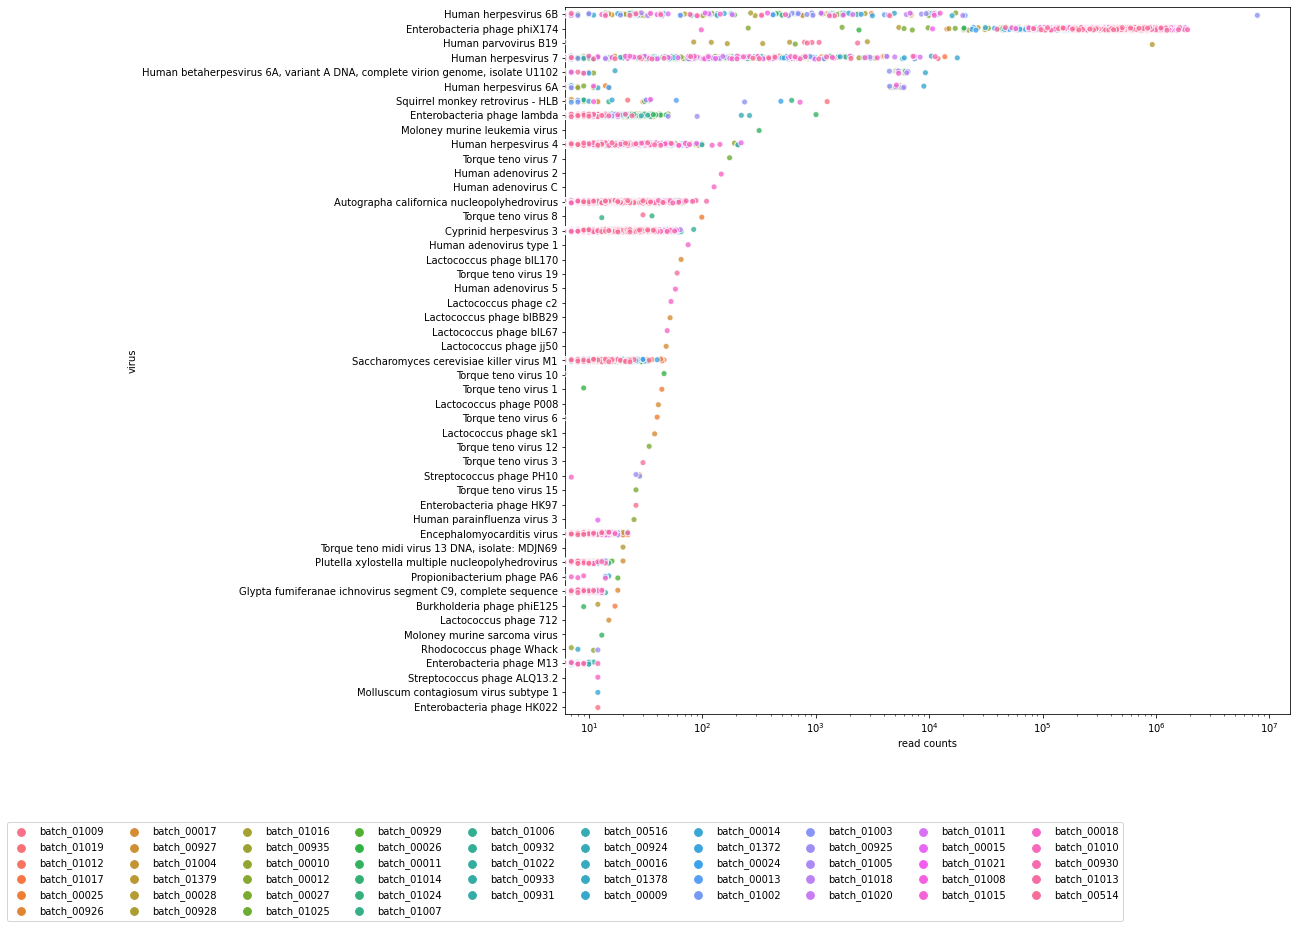

In [10]:
# fig, ax = plt.subplots(figsize=(13,13))
# ax.set(xscale="log")
# chart = sns.stripplot(data=df_melt, x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
#                       linewidth=1, size=6, edgecolor='white', palette='husl')
# plt.legend(loc="lower center", bbox_to_anchor=(0, -0.3), ncol=10)
# plt.show()

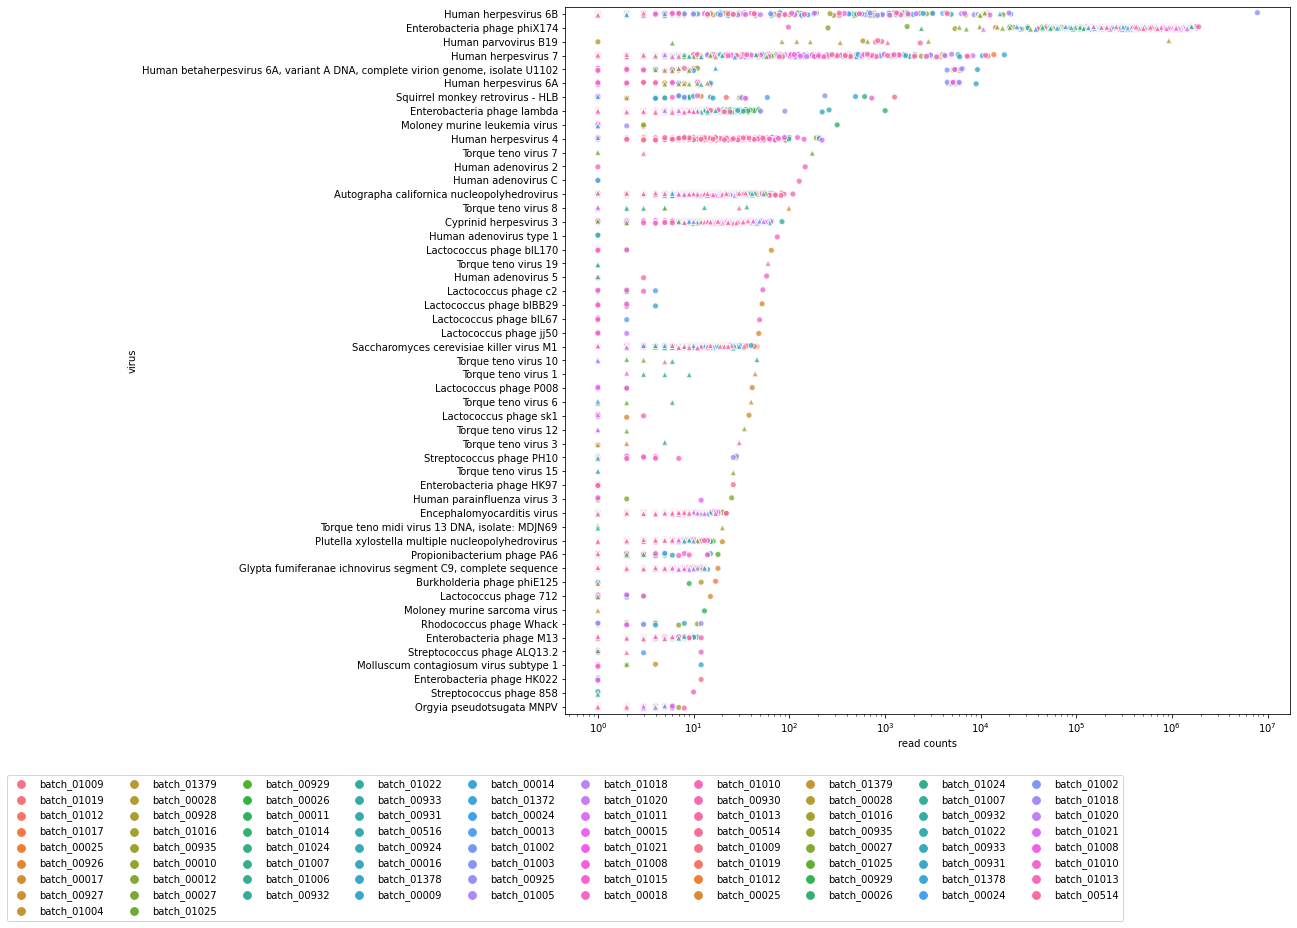

In [31]:
# # duplicate legends/coloring?

# fig, ax = plt.subplots(figsize=(13,13))
# ax.set(xscale="log")
# m = sns.stripplot(data=df_melt[df_melt['type'] == 'LCL'], x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
#                   linewidth=1, size=6, edgecolor='white', palette='husl', marker='o')
# n = sns.stripplot(data=df_melt[df_melt['type'] == 'WB'], x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
#                   linewidth=1, size=6, edgecolor='white', palette='husl', marker='^')
# plt.legend(loc="lower center", bbox_to_anchor=(0, -0.3), ncol=10)
# # handles, labels = n.get_legend_handles_labels()
# # n.legend(handles[:4], labels[:4])
# plt.show()

## Virus Clustered Heatmap

In [35]:
df = pd.read_csv('virus_abundance_data.csv', index_col=0)
column_labels = {x: x.split(', ')[0] for x in df.columns}
df.rename(columns=column_labels, inplace=True)
df.head()

,batch,Human herpesvirus 6B,Enterobacteria phage phiX174,Human parvovirus B19,Human herpesvirus 7,Human betaherpesvirus 6A,Human herpesvirus 6A,Squirrel monkey retrovirus - HLB,Enterobacteria phage lambda,Moloney murine leukemia virus,...,Torque teno mini virus 10 isolate LIL-y1 ORF2,Torque teno midi virus 8 DNA,Hepatitis C virus genotype 1,Lactobacillus phage Lv-1,Woodchuck hepatitis virus,Pseudomonas phage EL,Enterobacteria phage RB32,Bordetella phage BIP-1,Staphylococcus phage SAP-26,Enterococcus phage phiFL4A
03C23190 - LCL - AU1157,batch_01009,0.0,1085585.0,NaN,0.0,NaN,0.0,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23194 - WB - AU1157,batch_01009,0.0,1064727.0,NaN,0.0,NaN,0.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23208 - WB - AU1157,batch_01009,0.0,1090048.0,NaN,0.0,NaN,0.0,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23209 - WB - AU1157,batch_01009,0.0,1057893.0,NaN,1.0,NaN,0.0,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23211 - WB - AU1157,batch_01009,0.0,1231973.0,NaN,1.0,NaN,0.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
from sklearn.preprocessing import normalize
df_scaled = normalize(df.drop('batch', axis=1).fillna(0.), norm='l1', axis=0)
df_scaled = pd.DataFrame(df_scaled.T, index=df.drop('batch', axis=1).columns, columns=df.index)
print(df_scaled.shape)

(248, 4568)


In [41]:
df_scaled.sum(axis=1)

Human herpesvirus 6B            1.0
Enterobacteria phage phiX174    1.0
Human parvovirus B19            1.0
Human herpesvirus 7             1.0
Human betaherpesvirus 6A        1.0
                               ... 
Pseudomonas phage EL            1.0
Enterobacteria phage RB32       1.0
Bordetella phage BIP-1          1.0
Staphylococcus phage SAP-26     1.0
Enterococcus phage phiFL4A      1.0
Length: 248, dtype: float64

/home/users/chloehe/.local/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


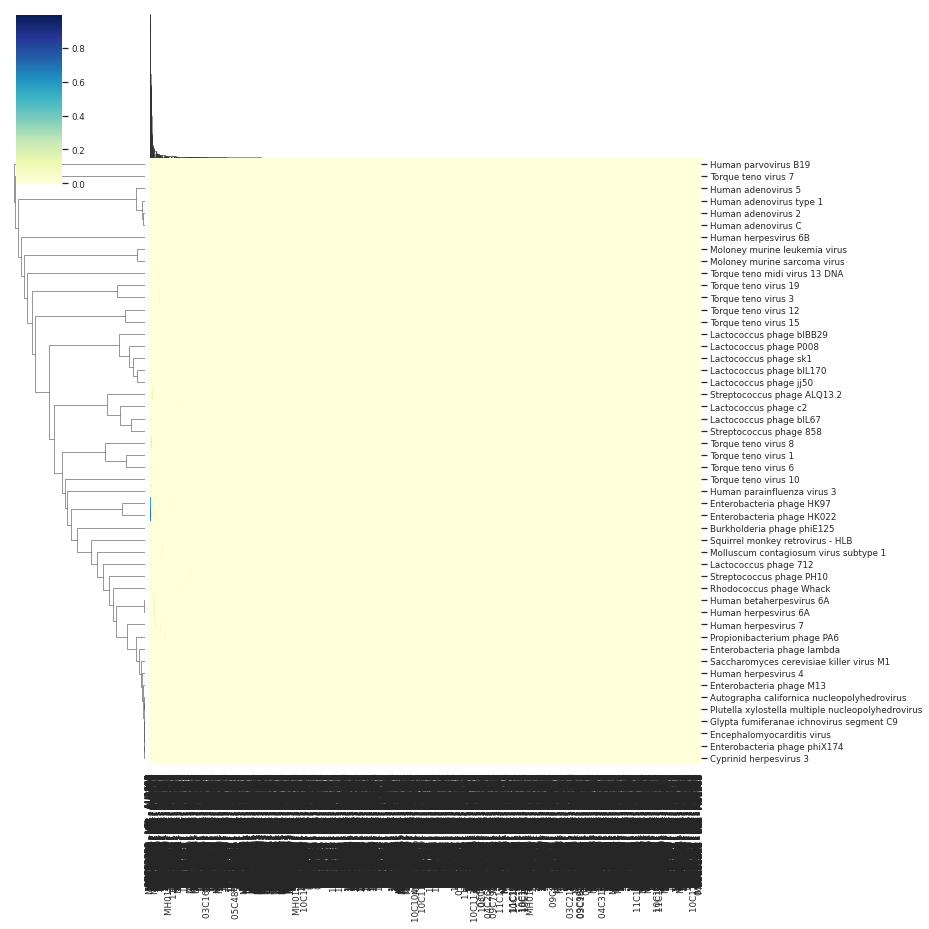

In [42]:
sns.set(font_scale=0.8)
fg = sns.clustermap(df_scaled.iloc[:50, :], cmap="YlGnBu", figsize=(13, 13), xticklabels=True)

## Microbes Abundance Plot

In [22]:
df = pd.read_csv('bacteria_abundance_data.csv', index_col=0)
df.head()

,batch,Pseudomonas fluorescens SBW25,"Fusobacterium ulcerans ATCC 49185 NZ_ACDH01000101,","Mollicutes bacterium D7 cont1.210, whole genome sh",Burkholderia sp. 383 chromosome 1,"Burkholderia sp. 383 chromosome 2, complete sequen",Burkholderia cenocepacia J2315 chromosome chromoso,Burkholderia cenocepacia MC0-3 chromosome 1,Burkholderia cenocepacia J2315 chromosome 2,"Burkholderia cenocepacia MC0-3 chromosome 2, compl",...,"Acinetobacter baumannii AB056 NZ_ADGZ01000108, who","Pseudomonas sp. UK4 Contig495, whole genome shotgu","Staphylococcus epidermidis W23144 contig00191, who","Hoeflea phototrophica DFL-43 1103279223836, whole","Pseudomonas sp. UK4 Contig1181, whole genome shotg","Peptostreptococcus anaerobius 653-L contig00053, w",Candida glabrata CBS 138 chromosome K,"Beggiatoa sp. PS contig24012, whole genome shotgun","Staphylococcus warneri L37603 contig00076, whole g","Desulfuromonas acetoxidans DSM 684 ctg63, whole ge"
03C23190 - LCL - AU1157,batch_01009,1.0,188121.0,165779.0,12.0,6.0,6.0,7.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23194 - WB - AU1157,batch_01009,1.0,221493.0,192315.0,10.0,4.0,11.0,7.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23208 - WB - AU1157,batch_01009,1.0,234.0,164.0,10.0,5.0,4.0,7.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23209 - WB - AU1157,batch_01009,1.0,196992.0,170795.0,5.0,5.0,3.0,8.0,7.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23211 - WB - AU1157,batch_01009,3.0,198470.0,170048.0,9.0,5.0,6.0,2.0,7.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
column_labels = {x: x.split(',')[0] for x in df.columns}
df.rename(columns=column_labels, inplace=True)

type_col = [x.split(' - ')[1] for x in list(df.index)]
df['type'] = type_col
df.head()

,batch,Pseudomonas fluorescens SBW25,Fusobacterium ulcerans ATCC 49185 NZ_ACDH01000101,Mollicutes bacterium D7 cont1.210,Burkholderia sp. 383 chromosome 1,Burkholderia sp. 383 chromosome 2,Burkholderia cenocepacia J2315 chromosome chromoso,Burkholderia cenocepacia MC0-3 chromosome 1,Burkholderia cenocepacia J2315 chromosome 2,Burkholderia cenocepacia MC0-3 chromosome 2,...,Pseudomonas sp. UK4 Contig495,Staphylococcus epidermidis W23144 contig00191,Hoeflea phototrophica DFL-43 1103279223836,Pseudomonas sp. UK4 Contig1181,Peptostreptococcus anaerobius 653-L contig00053,Candida glabrata CBS 138 chromosome K,Beggiatoa sp. PS contig24012,Staphylococcus warneri L37603 contig00076,Desulfuromonas acetoxidans DSM 684 ctg63,type
03C23190 - LCL - AU1157,batch_01009,1.0,188121.0,165779.0,12.0,6.0,6.0,7.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCL
03C23194 - WB - AU1157,batch_01009,1.0,221493.0,192315.0,10.0,4.0,11.0,7.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB
03C23208 - WB - AU1157,batch_01009,1.0,234.0,164.0,10.0,5.0,4.0,7.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB
03C23209 - WB - AU1157,batch_01009,1.0,196992.0,170795.0,5.0,5.0,3.0,8.0,7.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB
03C23211 - WB - AU1157,batch_01009,3.0,198470.0,170048.0,9.0,5.0,6.0,2.0,7.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB


In [31]:
columns = list(df.columns[:52])
columns.append('type')

# take top 50
df_melt = pd.melt(df.loc[:, columns].reset_index(), id_vars=['index', 'batch', 'type'])
df_melt.rename(columns={'variable': 'virus', 'value': 'read counts'}, inplace=True)

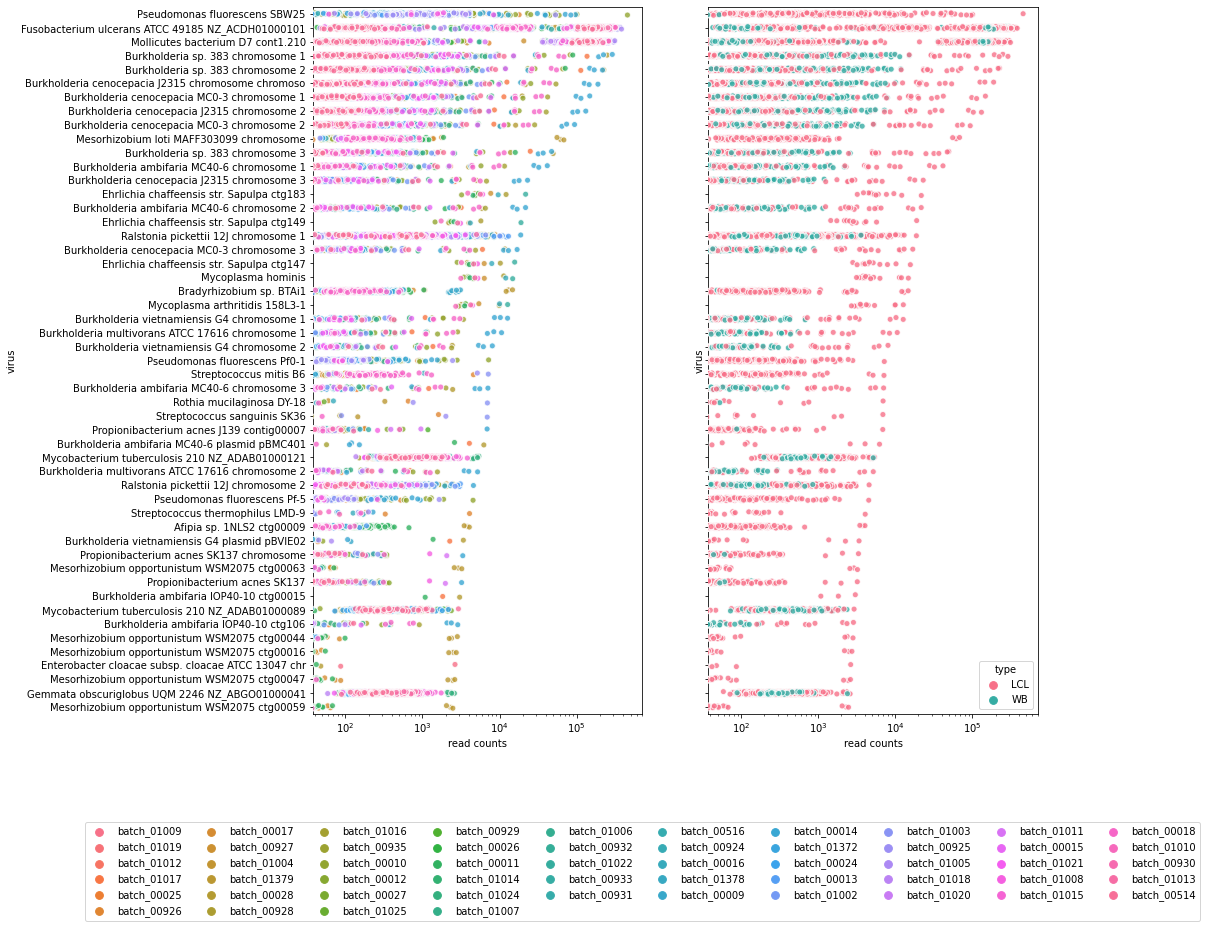

In [32]:
fig, axes = plt.subplots(figsize=(13,13), sharex=True, sharey=True)
ax1 = plt.subplot(121)
ax1.set(xscale="log")
sns.stripplot(data=df_melt, x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
plt.legend(loc="lower center", bbox_to_anchor=(1, -0.3), ncol=10)

ax2 = plt.subplot(122)
ax2.set(xscale="log")
sns.stripplot(data=df_melt, x='read counts', y='virus', hue='type', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.show()

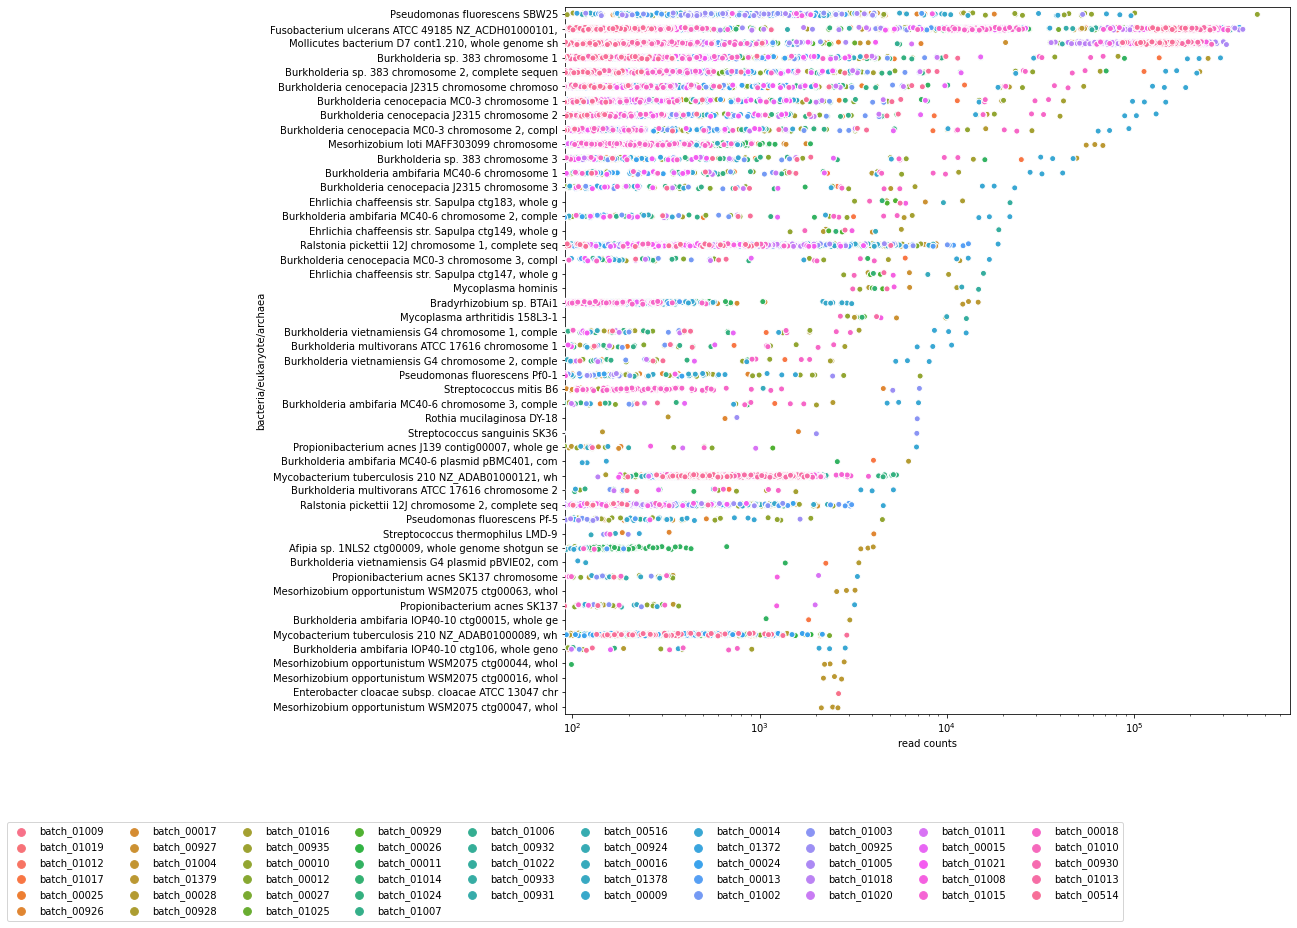

In [18]:
# fig, ax = plt.subplots(figsize=(13,13))
# ax.set(xscale="log")
# chart = sns.stripplot(data=df_melt, x='read counts', y='bacteria/eukaryote/archaea', hue='batch', orient='h', 
#                       linewidth=1, size=6, edgecolor='white', palette='husl')
# plt.legend(loc="lower center", bbox_to_anchor=(0, -0.3), ncol=10)
# plt.show()

## Microbe Clustered Heatmap

In [2]:
df = pd.read_csv('bacteria_abundance_data.csv', index_col=0)
column_labels = {x: x.split(', ')[0] for x in df.columns}
df.rename(columns=column_labels, inplace=True)
df.head()

,batch,Pseudomonas fluorescens SBW25,"Fusobacterium ulcerans ATCC 49185 NZ_ACDH01000101,",Mollicutes bacterium D7 cont1.210,Burkholderia sp. 383 chromosome 1,Burkholderia sp. 383 chromosome 2,Burkholderia cenocepacia J2315 chromosome chromoso,Burkholderia cenocepacia MC0-3 chromosome 1,Burkholderia cenocepacia J2315 chromosome 2,Burkholderia cenocepacia MC0-3 chromosome 2,...,Acinetobacter baumannii AB056 NZ_ADGZ01000108,Pseudomonas sp. UK4 Contig495,Staphylococcus epidermidis W23144 contig00191,Hoeflea phototrophica DFL-43 1103279223836,Pseudomonas sp. UK4 Contig1181,Peptostreptococcus anaerobius 653-L contig00053,Candida glabrata CBS 138 chromosome K,Beggiatoa sp. PS contig24012,Staphylococcus warneri L37603 contig00076,Desulfuromonas acetoxidans DSM 684 ctg63
03C23190 - LCL - AU1157,batch_01009,1.0,188121.0,165779.0,12.0,6.0,6.0,7.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23194 - WB - AU1157,batch_01009,1.0,221493.0,192315.0,10.0,4.0,11.0,7.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23208 - WB - AU1157,batch_01009,1.0,234.0,164.0,10.0,5.0,4.0,7.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23209 - WB - AU1157,batch_01009,1.0,196992.0,170795.0,5.0,5.0,3.0,8.0,7.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23211 - WB - AU1157,batch_01009,3.0,198470.0,170048.0,9.0,5.0,6.0,2.0,7.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
from sklearn.preprocessing import normalize
df_scaled = normalize(df.drop('batch', axis=1).fillna(0.), norm='l1', axis=0)
# df_scaled = np.where(df_scaled > 0, df_scaled, np.nan)
df_scaled += np.nextafter(0, 1)
df_scaled = pd.DataFrame(df_scaled.T, index=df.drop('batch', axis=1).columns, columns=df.index)
print(df_scaled.shape)

(28515, 4568)


In [4]:
df_scaled.head()

,03C23190 - LCL - AU1157,03C23194 - WB - AU1157,03C23208 - WB - AU1157,03C23209 - WB - AU1157,03C23211 - WB - AU1157,03C23214 - LCL - AU1165,03C23221 - LCL - AU1165,03C23222 - LCL - AU1165,03C23225 - LCL - AU1165,03C23239 - LCL - AU1165,...,10C108279 - WB - AU3777,10C115945 - WB - AU2293,10C115946 - WB - AU2293,10C115947 - LCL - AU2293,10C115948 - WB - AU2293,10C115949 - WB - AU2293,10C117062 - WB - AU3903,10C117063 - WB - AU3903,10C117064 - WB - AU3903,10C117065 - WB - AU3903
Pseudomonas fluorescens SBW25,5.173589e-07,5.173589e-07,5.173589e-07,5.173589e-07,0.000002,5.173589e-07,4.940656e-324,5.173589e-07,4.759702e-05,4.940656e-324,...,4.940656e-324,4.656231e-06,3.621513e-06,0.000003,4.138872e-06,0.000002,6.725666e-06,4.940656e-324,0.000003,1.034718e-06
"Fusobacterium ulcerans ATCC 49185 NZ_ACDH01000101,",4.895832e-04,5.764335e-04,6.089828e-07,5.126699e-04,0.000517,5.371203e-04,4.792981e-04,5.555719e-04,5.389889e-04,7.963622e-07,...,2.992864e-07,1.379320e-07,3.227089e-07,0.000327,3.149014e-07,0.000426,2.134042e-07,3.175039e-07,0.000416,1.665594e-07
Mollicutes bacterium D7 cont1.210,5.312318e-04,6.162653e-04,5.255311e-07,5.473054e-04,0.000545,5.697815e-04,5.057340e-04,5.848136e-04,5.747131e-04,6.344827e-07,...,1.474051e-07,2.819923e-07,2.627656e-07,0.000347,1.858586e-07,0.000448,2.467433e-07,3.396725e-07,0.000439,1.794496e-07
Burkholderia sp. 383 chromosome 1,5.645191e-06,4.704326e-06,4.704326e-06,2.352163e-06,0.000004,4.704326e-06,1.881730e-06,3.763461e-06,4.704326e-07,6.586056e-06,...,1.354846e-04,2.352163e-06,4.704326e-07,0.000033,7.997354e-06,0.000007,2.540336e-05,5.362932e-05,0.000027,7.056489e-06
Burkholderia sp. 383 chromosome 2,3.519394e-06,2.346263e-06,2.932828e-06,2.932828e-06,0.000003,1.759697e-06,2.932828e-06,2.932828e-06,5.865657e-07,9.385050e-06,...,1.372564e-04,2.346263e-06,1.173131e-06,0.000028,5.279091e-06,0.000005,2.815515e-05,5.982970e-05,0.000033,5.279091e-06


help: https://stackoverflow.com/questions/36898008/seaborn-heatmap-with-logarithmic-scale-colorbar

/home/users/chloehe/.local/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


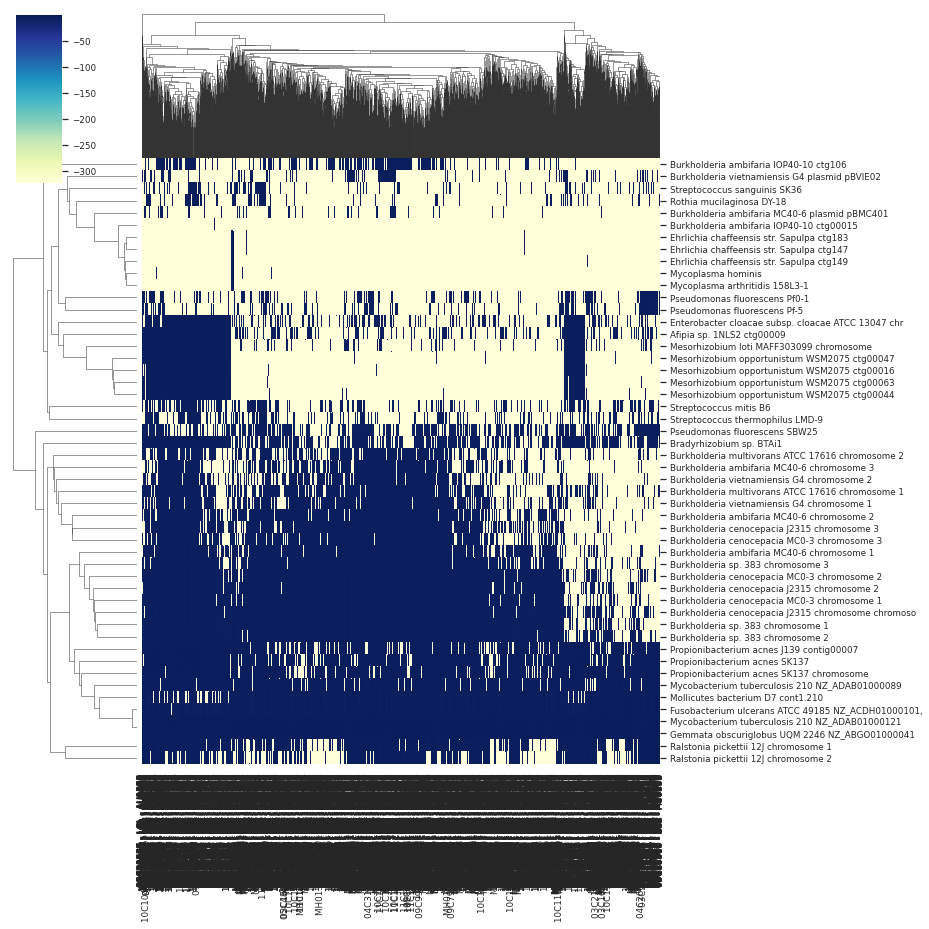

In [5]:
df_logscaled = np.log10(df_scaled)
sns.set(font_scale=0.8)
fg = sns.clustermap(df_logscaled.iloc[:50, :], cmap="YlGnBu", figsize=(13, 13), xticklabels=True)